In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('preprocessed_train_with_avg.csv')
original_data = df

In [3]:
df.describe()

,StoreID,IsHoliday,HasPromotions,NearestCompetitor,Region,NumberOfSales,Region_PopulationK,CloudCover,Events,Max_Dew_PointC,...,Week,Quarter,IsOpen_yesterday,IsOpen_tomorrow,IsHoliday_yesterday,IsHoliday_tomorrow,Year,daily_sales,month_avg_sales,yearly_sales
count,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,...,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,4.339580e+05
mean,1373.938579,0.000945,0.449507,8042.993882,5.727451,4890.089953,3845.765475,5.341146,1.039875,8.566239,...,25.936425,2.465907,0.807922,0.808212,0.035570,0.032337,2016.648120,4890.089953,123218.984268,9.584107e+05
std,216.245290,0.030723,0.497444,11640.203554,3.357071,2215.403562,2816.324768,2.121681,0.800221,5.987954,...,14.932961,1.116023,0.393935,0.393708,0.185216,0.176894,0.631011,1718.193189,46621.951063,3.658630e+05
min,1000.000000,0.000000,0.000000,47.000000,0.000000,0.000000,816.000000,0.000000,0.000000,-14.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1912.614876,31734.000000,3.727537e+05
25%,1188.000000,0.000000,0.000000,1057.000000,3.000000,3386.000000,1293.000000,4.000000,1.000000,4.000000,...,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2016.000000,3710.718076,91695.000000,7.066603e+05
50%,1373.000000,0.000000,0.000000,3307.000000,6.000000,4469.500000,1892.000000,6.000000,1.000000,9.000000,...,26.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2017.000000,4667.260297,115841.000000,9.015133e+05
75%,1561.000000,0.000000,1.000000,9761.000000,9.000000,5911.000000,5727.000000,7.000000,1.000000,13.000000,...,39.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2017.000000,5676.378109,144274.000000,1.135535e+06
max,1748.000000,1.000000,1.000000,85070.000000,10.000000,26641.000000,8146.000000,8.000000,4.000000,23.000000,...,52.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,15312.660626,531665.500000,3.526966e+06


# Correlation - heat map

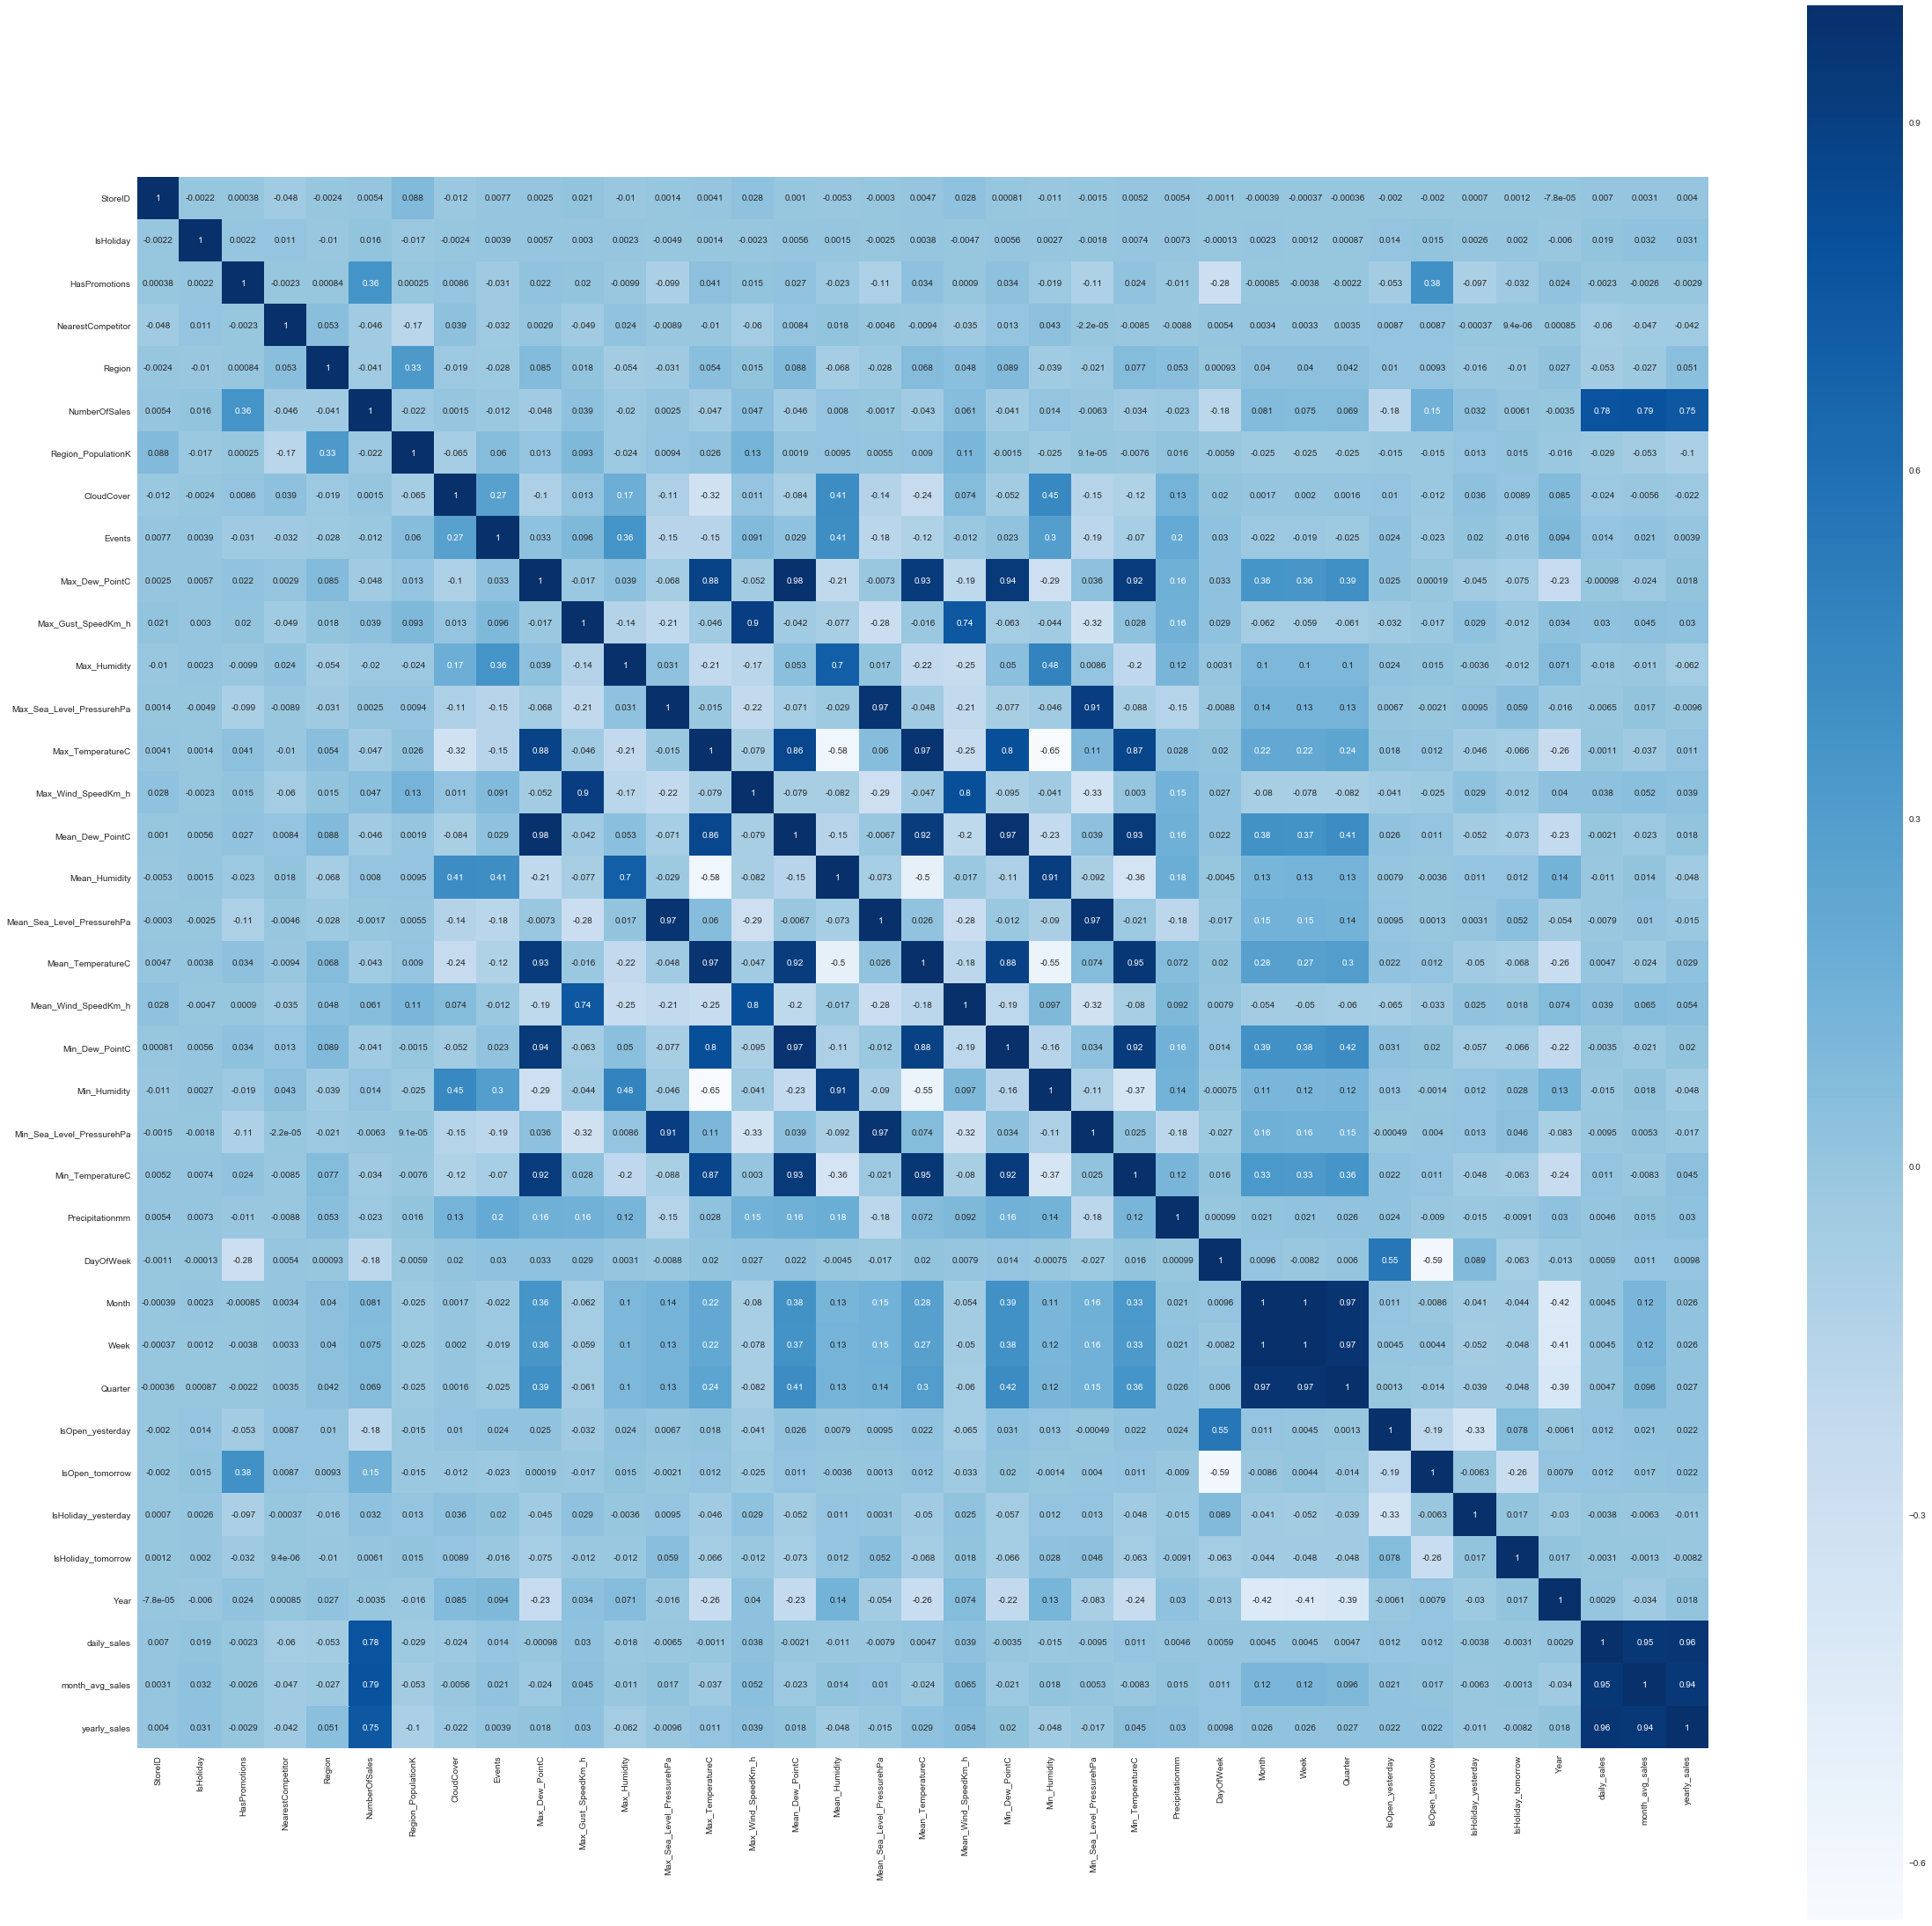

In [4]:
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":5})   

fig, ax = plt.subplots(figsize=(40,40))  

cov=df.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues")

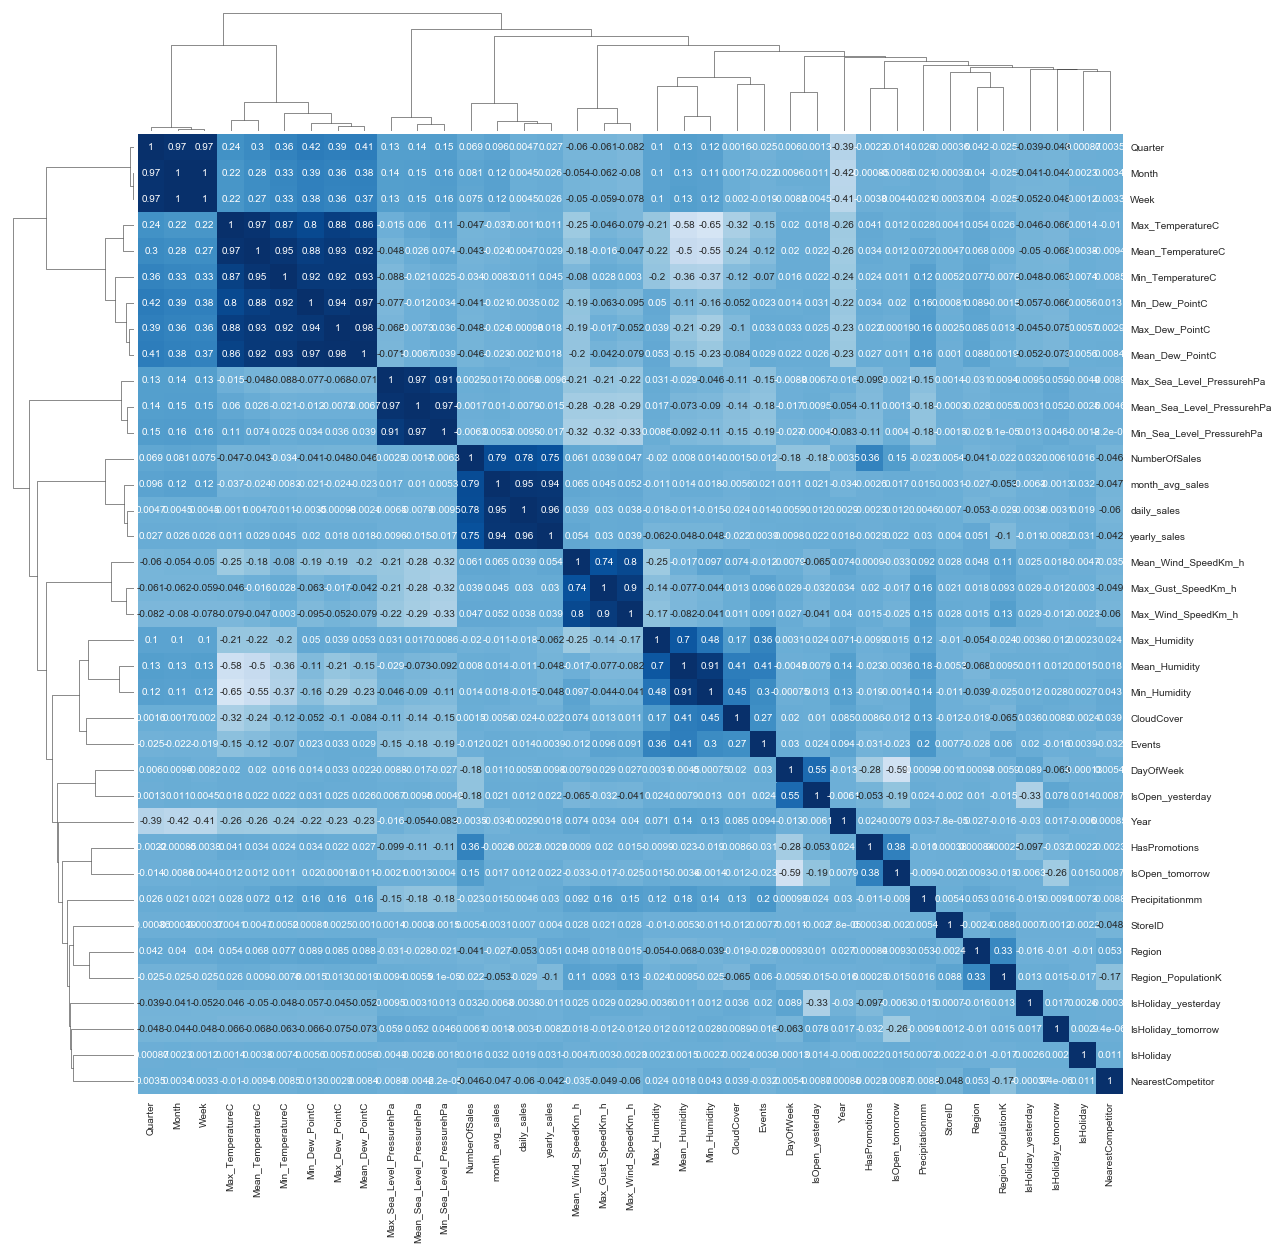

In [5]:
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(20, 20))
cm.cax.set_visible(False)

# Sales per week
Not much to see, just an increament of sales during the christmas period

In [14]:
df_grouped = original_data.groupby(['Region','Week','StoreID','Year'], as_index=False).agg({"NumberOfSales": "sum"})
df_grouped.head()

,Region,Week,StoreID,Year,NumberOfSales
0,0,1,1001,2017,13873
1,0,1,1001,2018,17844
2,0,1,1009,2017,21091
3,0,1,1009,2018,20440
4,0,1,1019,2017,19655


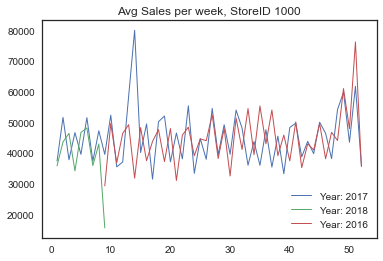

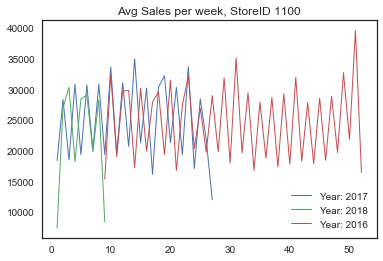

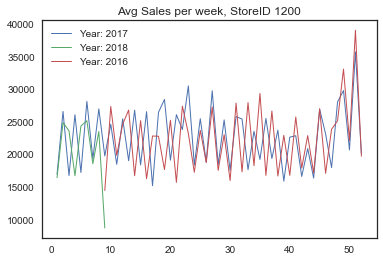

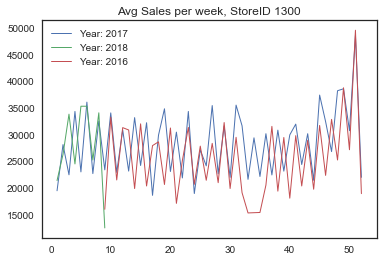

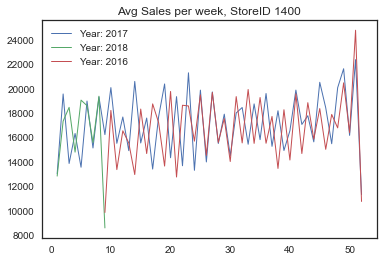

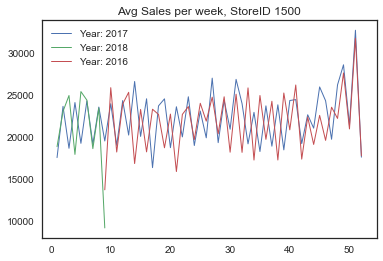

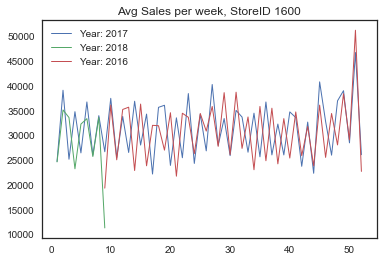

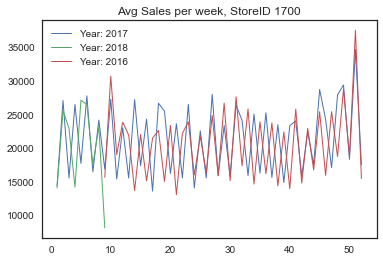

In [16]:
for s in range(1000,1748,100):
    data = df_grouped[df_grouped.StoreID == s]
    data.index = data.Week
    for y in data.Year.unique():
        dt = data[data.Year == y]
        line = dt['NumberOfSales']
        plt.plot(line, label='Year: %d'%y)
        
    plt.title('Avg Sales per week, StoreID %i' %s)
    #my_xticks = ['Mon','Tue','Wed','Thu','Fri','Sat']
    #plt.xticks(range(6),my_xticks)
    plt.legend()
    plt.show()
    

# Sales per weekday and year

In [8]:
df_grouped = original_data.groupby(['DayOfWeek','StoreID','Year'], as_index=False).agg({"NumberOfSales": "mean"})
df_grouped.tail()

,DayOfWeek,StoreID,Year,NumberOfSales
13529,6,1676,2016,4979.581395
13530,6,1676,2017,5137.547170
13531,6,1676,2018,5445.625000
13532,6,1720,2016,2422.909091
13533,6,1720,2017,2590.588235


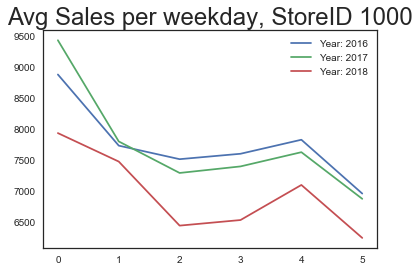

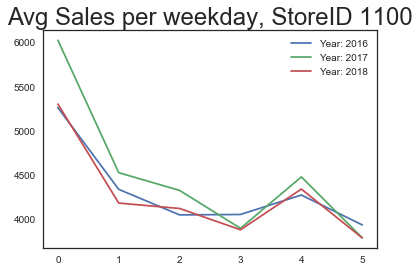

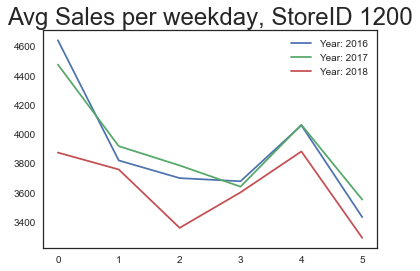

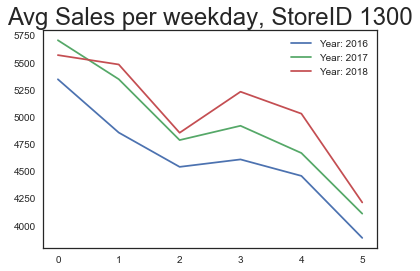

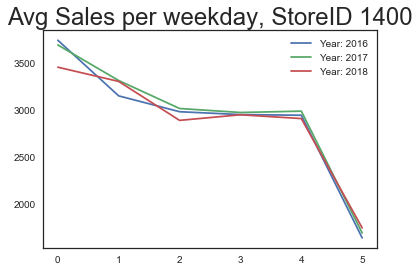

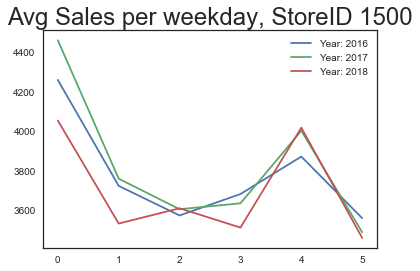

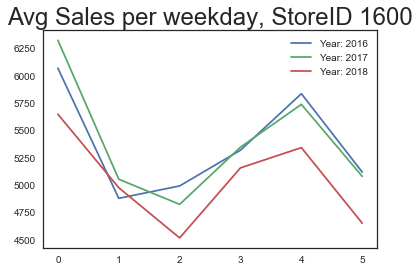

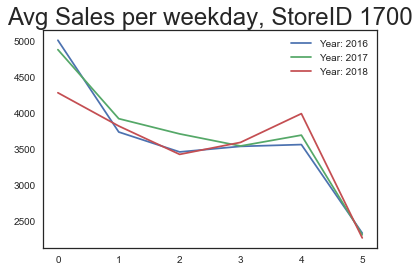

In [9]:
for s in range(1000,1748,100):
    data = df_grouped[df_grouped.StoreID == s]
    data.index = data.DayOfWeek
    for y in data.Year.unique():
        dt = data[data.Year == y]
        line = dt['NumberOfSales']
        plt.plot(line, label='Year: %d'%y)
        
    plt.title('Avg Sales per weekday, StoreID %i' %s)
    #my_xticks = ['Mon','Tue','Wed','Thu','Fri','Sat']
    #plt.xticks(range(6),my_xticks)
    plt.legend()
    plt.show()
    

# Sales per weekday and promotions

In [10]:
df_grouped = original_data.groupby(['DayOfWeek','StoreID','HasPromotions'], as_index=False).agg({"NumberOfSales": "mean"})
df_grouped.tail()

,DayOfWeek,StoreID,HasPromotions,NumberOfSales
8254,6,1445,0,1433.014925
8255,6,1517,0,1346.774194
8256,6,1615,0,2071.542857
8257,6,1676,0,5095.932692
8258,6,1720,0,2508.000000


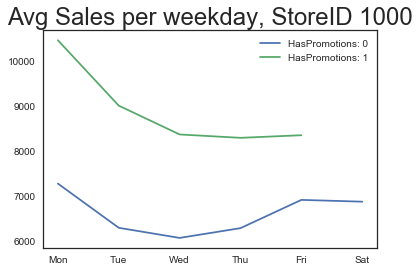

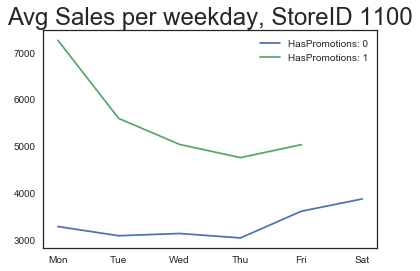

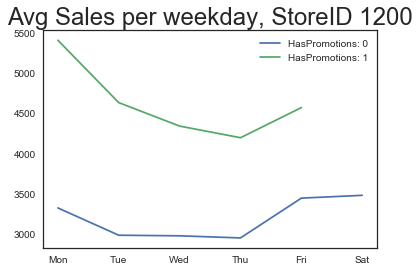

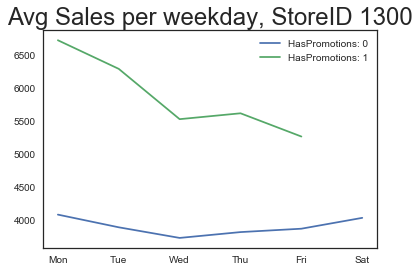

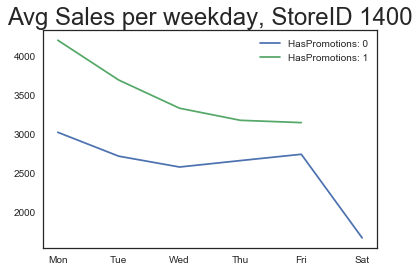

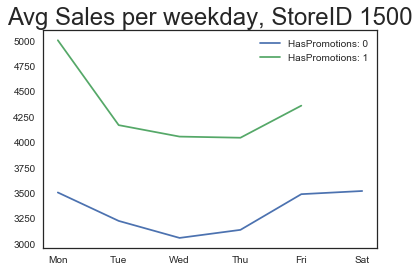

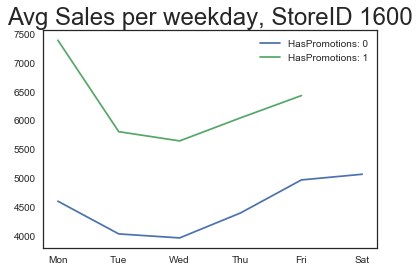

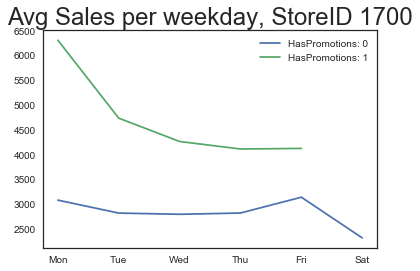

In [11]:
for s in range(1000,1748,100):
    data = df_grouped[df_grouped.StoreID == s]
    data.index = data.DayOfWeek
    for h in data.HasPromotions.unique():
        dt = data[data.HasPromotions == h]
        line = dt['NumberOfSales']
        plt.plot(line, label='HasPromotions: %d'%h)
        
    plt.title('Avg Sales per weekday, StoreID %i' %s)
    my_xticks = ['Mon','Tue','Wed','Thu','Fri','Sat']
    plt.xticks(range(6),my_xticks)
    plt.legend()
    plt.show()
    

# What's else?

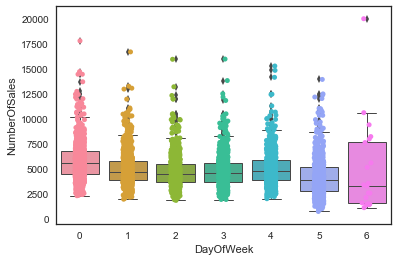

In [12]:
df_grouped = original_data.groupby(['DayOfWeek','StoreID'], as_index=False).agg({"NumberOfSales": "mean"})


sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
ax = sns.boxplot(x="DayOfWeek", y="NumberOfSales", data=df_grouped)
ax = sns.stripplot(x="DayOfWeek", y="NumberOfSales", data=df_grouped, jitter=True, edgecolor="gray")